In [2]:
import os
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm import tqdm
import pandas as pd
from PIL import Image
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Set the base directory to the location of the dataset
BASE_DIR = 'UTKFace2'

# Initialize lists to hold age labels and image paths
age_labels = []
image_paths = []

# Load image filenames
image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

In [5]:
for image in tqdm(image_filenames):
    image_path = os.path.join(BASE_DIR, image)
    img_components = image.split('_')
    age_label = int(img_components[0])
    age_labels.append(age_label)
    image_paths.append(image_path)

print(f'Number of age_labels: {len(age_labels)}, Number of image_paths: {len(image_paths)}')

100%|███████████████████████████████████████████████████████████████████████████| 3252/3252 [00:00<00:00, 74052.09it/s]

Number of age_labels: 3252, Number of image_paths: 3252


In [6]:
df = pd.DataFrame()
df['image_path'], df['age'] = image_paths, age_labels
df.head(5)

,image_path,age
0,UTKFace2\26_0_3_20170119192058354.jpg,26
1,UTKFace2\50_0_0_20170120222230975.jpg,50
2,UTKFace2\55_0_3_20170119181425916.jpg,55
3,UTKFace2\29_1_3_20170119195530916.jpg,29
4,UTKFace2\45_1_0_20170119192452937.jpg,45


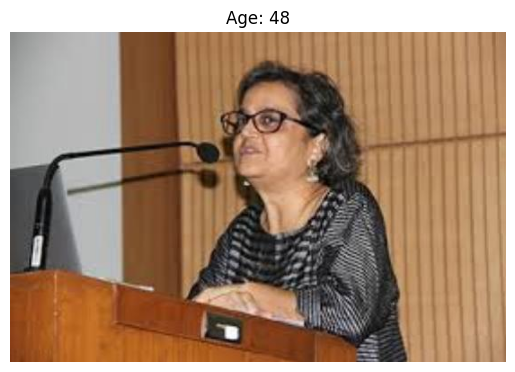

In [8]:
# Display a random image with its age label
rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age}')
plt.axis('off')
plt.imshow(IMG)
plt.show()

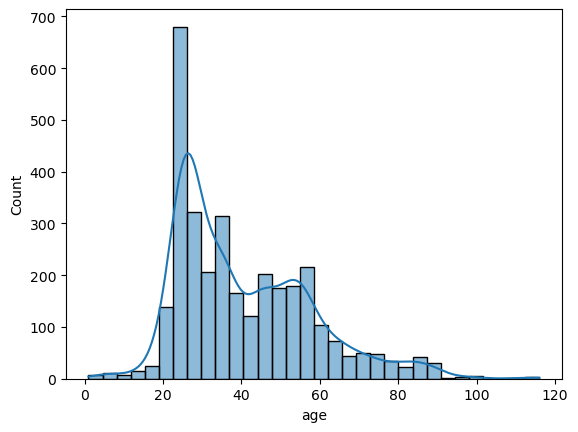

In [7]:
# Plot age distribution
sns.histplot(df['age'], kde=True)
plt.show()

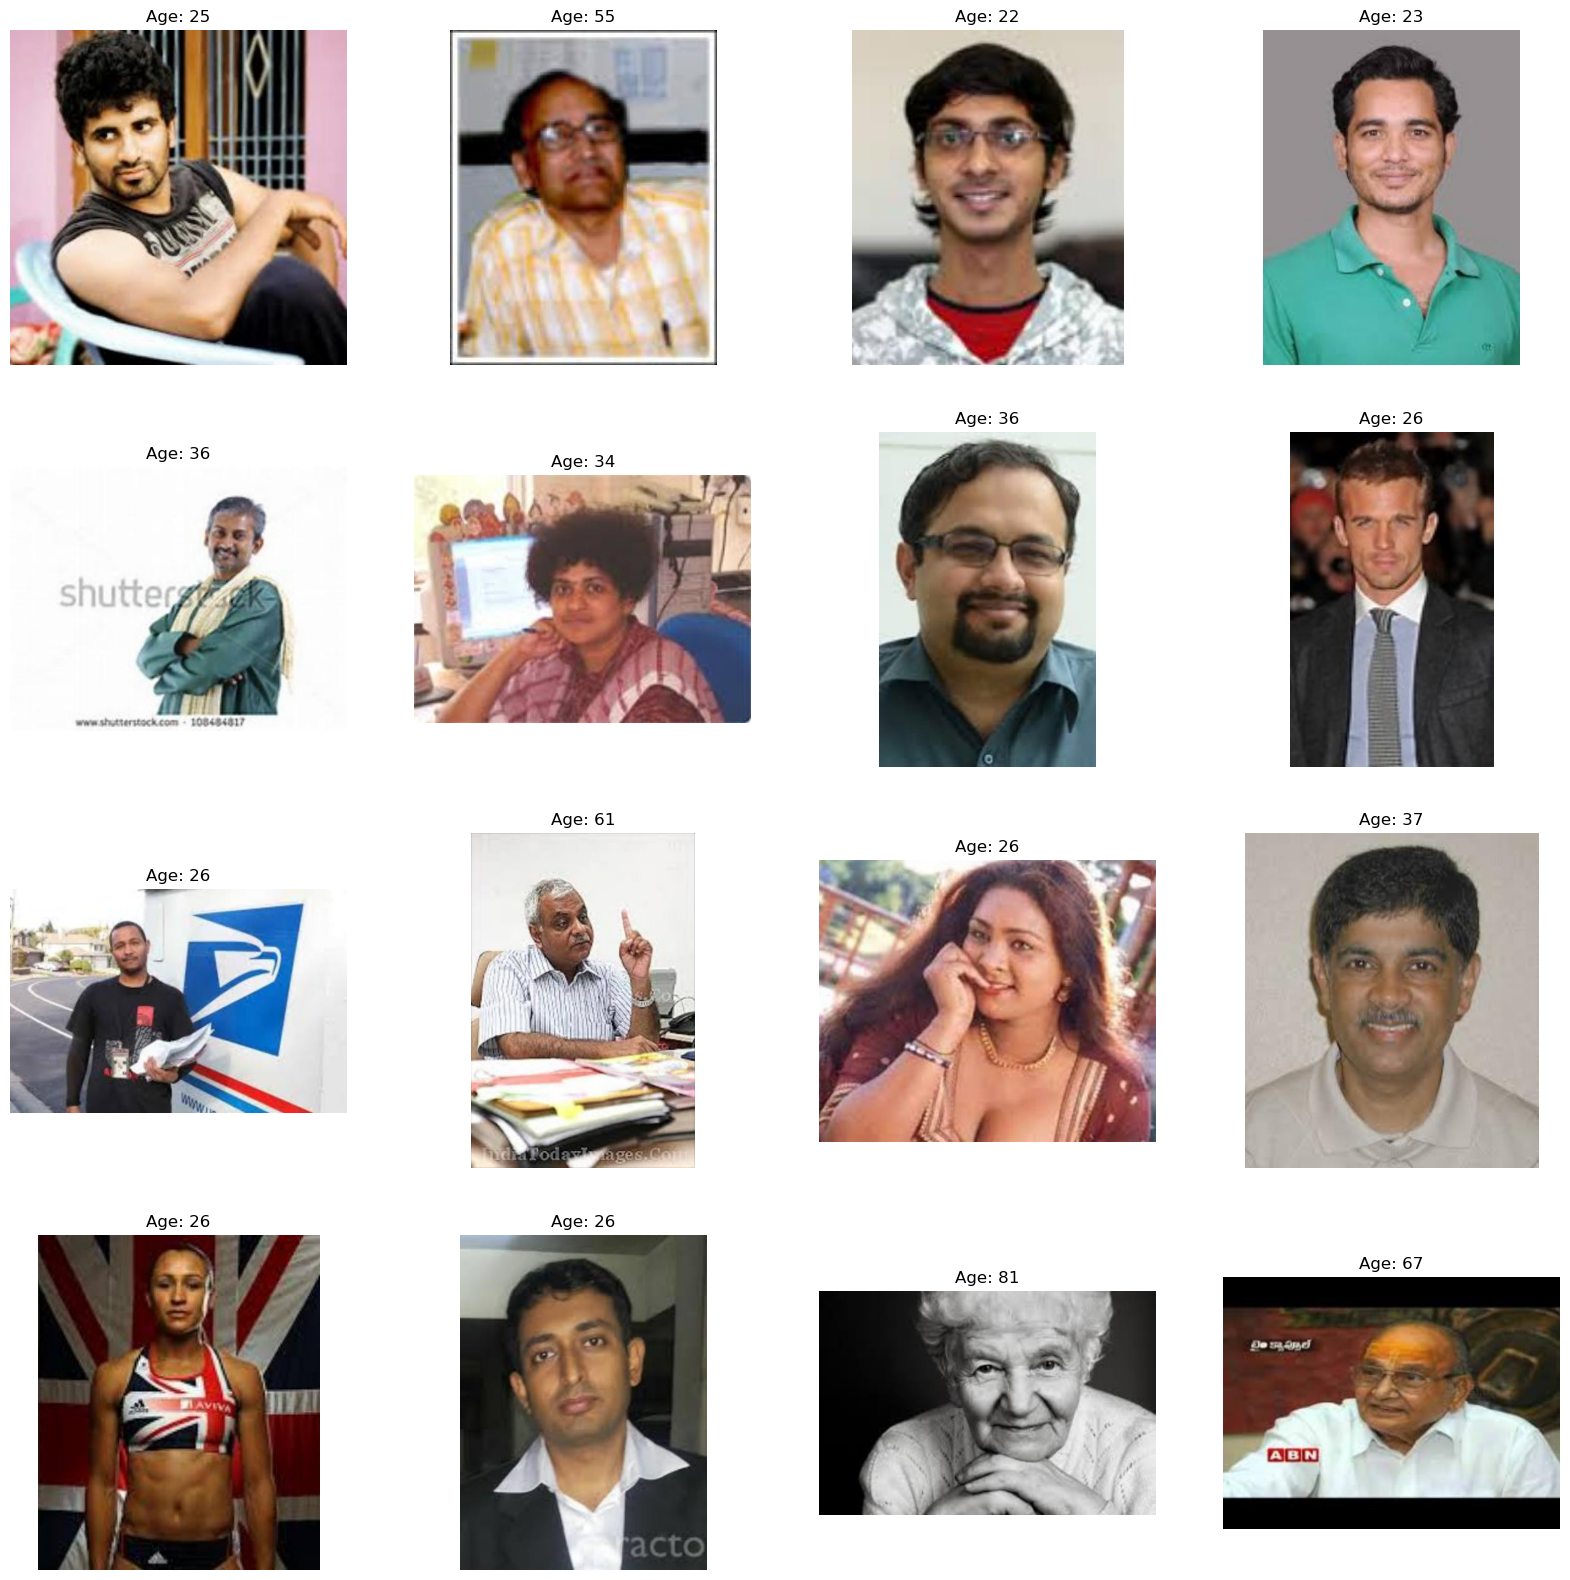

In [8]:
# Display samples of images and their age labels
plt.figure(figsize=(20, 20))
samples = df.iloc[0:16]
for index, (sample, age) in samples.iterrows():
    plt.subplot(4, 4, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age}')
    plt.imshow(img)
plt.show()

In [9]:
def extract_image_features(images):
    features = list()
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.LANCZOS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [10]:
# Extract features and normalize them
X = extract_image_features(df['image_path'])
X = X / 255.0
y_age = np.array(df['age'])


100%|█████████████████████████████████████████████████████████████████████████████| 3252/3252 [00:27<00:00, 117.96it/s]


In [11]:
# Build the model
input_shape = (128, 128, 1)
inputs = Input(input_shape)
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
flatten = Flatten()(max_4)
dense_1 = Dense(256, activation='relu')(flatten)
dropout_1 = Dropout(0.3)(dense_1)
output_1 = Dense(1, activation='relu', name='age_out')(dropout_1)

model = Model(inputs=[inputs], outputs=[output_1])


In [12]:
# Compile the model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [13]:
from tensorflow.keras.utils import plot_model

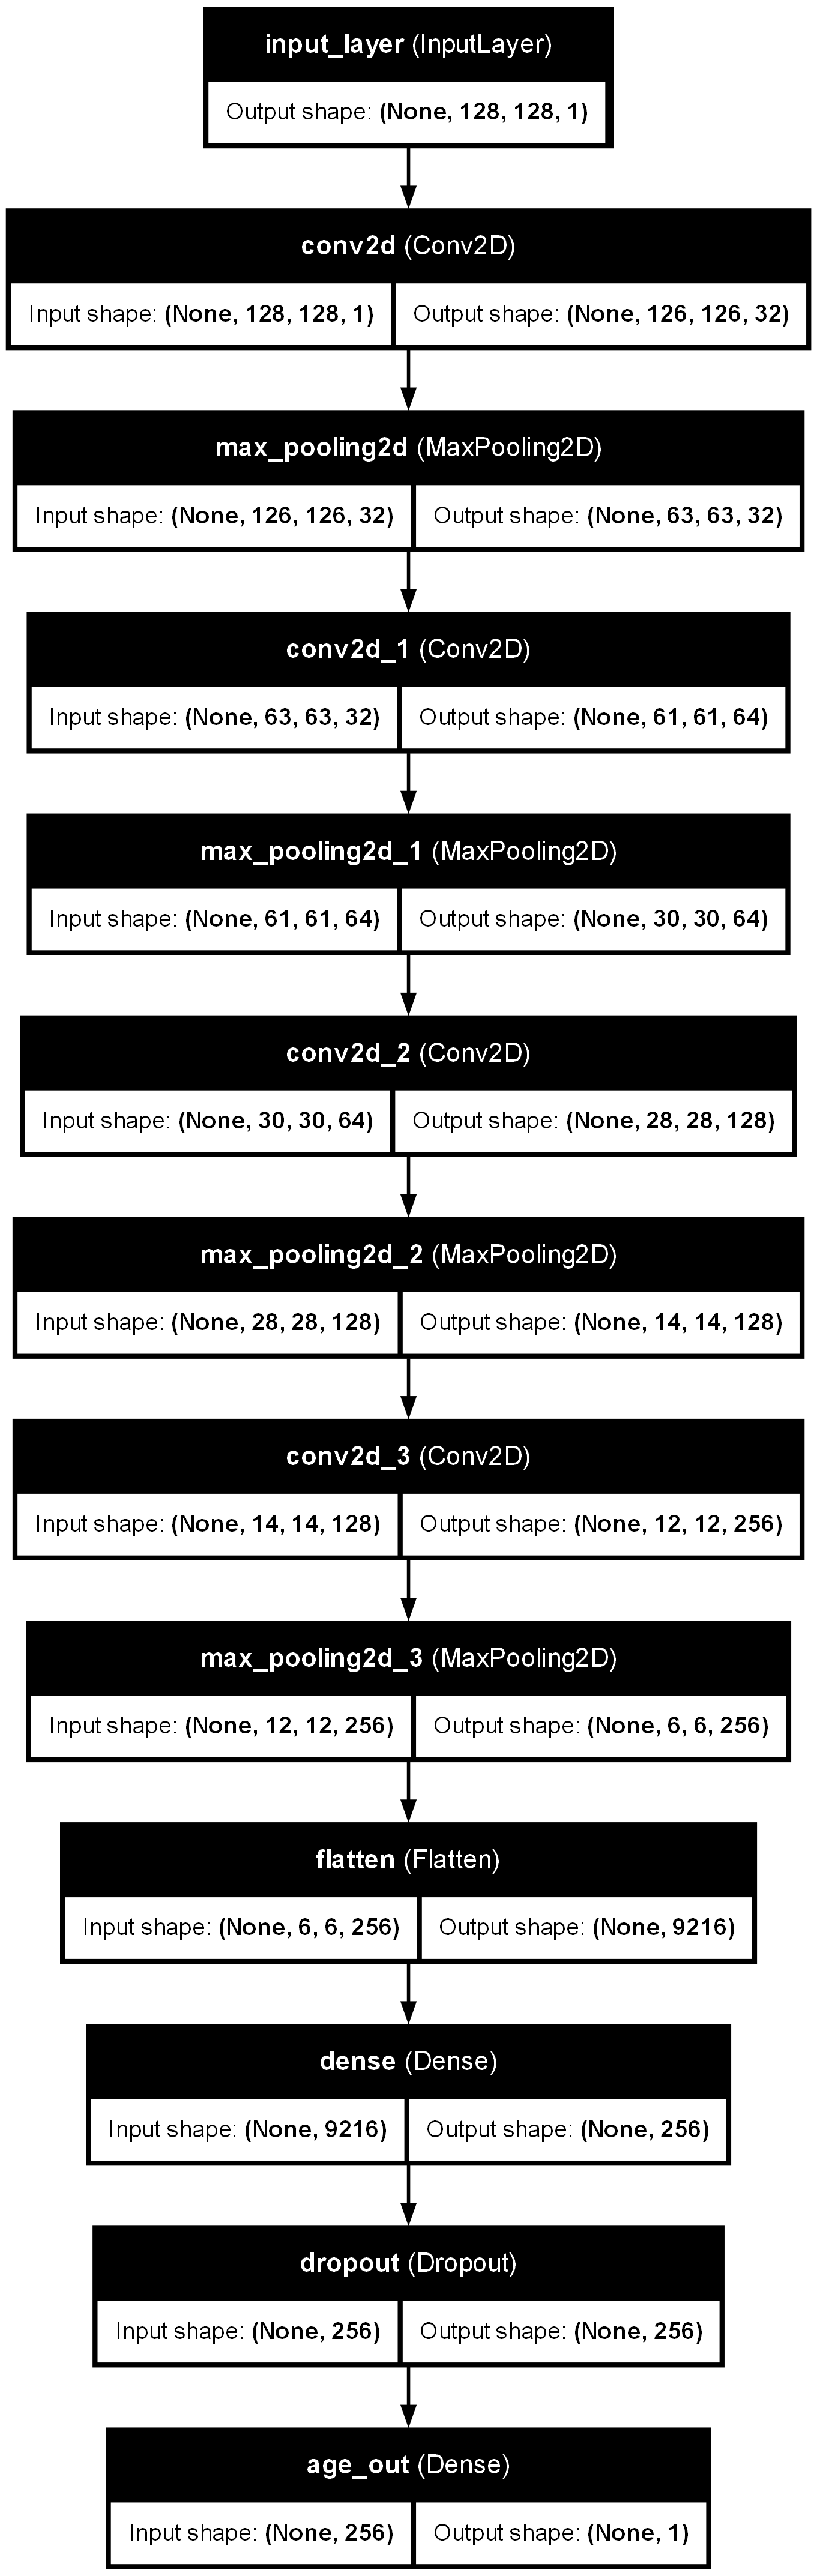

In [14]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [15]:
history = model.fit(x=X, y=y_age, batch_size=32, epochs=20, validation_split=0.2)


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 65s 720ms/step - loss: 19.1270 - mae: 19.1270 - val_loss: 13.6102 - val_mae: 13.6102
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 64s 782ms/step - loss: 14.2109 - mae: 14.2109 - val_loss: 14.4540 - val_mae: 14.4540
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 62s 750ms/step - loss: 14.2212 - mae: 14.2212 - val_loss: 12.5470 - val_mae: 12.5470
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 54s 663ms/step - loss: 13.2321 - mae: 13.2321 - val_loss: 13.2885 - val_mae: 13.2885
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 53s 649ms/step - loss: 12.7060 - mae: 12.7060 - val_loss: 12.9278 - val_mae: 12.9278
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 81s 629ms/step - loss: 12.3805 - mae: 12.3805 - val_loss: 11.7191 - val_mae: 11.7191
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 53s 641ms/step - loss: 11.9719 - mae: 11.9719 - val_loss: 11.5701 - val_mae: 11.5701
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 51s 623ms/step - loss: 11.0406 - mae: 11.0406 - val_loss: 11.4650 - val_mae: 11.4650
Epoch 9/20
82/82

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

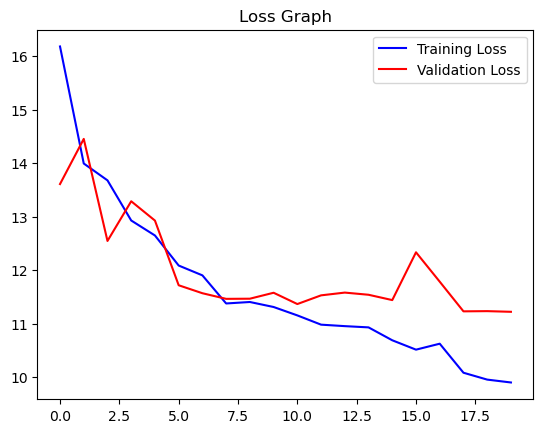

In [17]:
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [19]:
# Function to get image features for prediction
def get_image_features(image):
    img = load_img(image, color_mode='grayscale')
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img)
    img = img.reshape(1, 128, 128, 1)
    img = img / 255.0
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


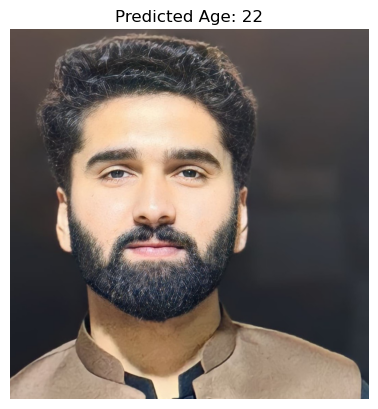

In [22]:
# Predict age for a new image
img_to_test = 'test.jpeg'
features = get_image_features(img_to_test)
pred = model.predict(features)
age = round(pred[0][0])
plt.title(f'Predicted Age: {age}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))
plt.show()
